# Breast Cancer Classification with K-Nearest Neighbors (KNN)

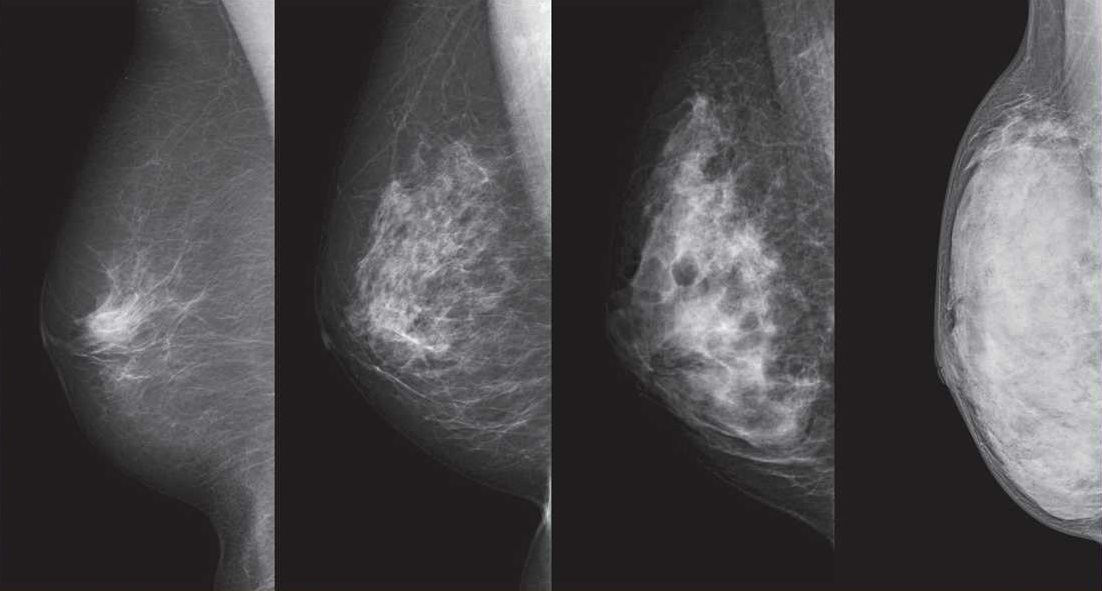

_____
## Overview
Machine learning assignment focused on breast cancer classification using the **K-Nearest Neighbors (KNN) algorithm**. The assignment utilizes the widely-used Breast Cancer Wisconsin (Diagnostic) dataset available on Kaggle.

### Dataset
- **Dataset:** [Breast Cancer Wisconsin (Diagnostic)](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)
- **Objective:** Predict whether a breast mass is malignant or benign based on features extracted from fine needle aspirate (FNA) digitized images.

### Attribute Information:

1. ID number
2. Diagnosis (M = malignant, B = benign)
3. Ten real-valued features are computed for each cell nucleus:

        a) radius (mean of distances from center to points on the perimeter)
        b) texture (standard deviation of gray-scale values)
        c) perimeter
        d) area
        e) smoothness (local variation in radius lengths)
        f) compactness (perimeter^2 / area - 1.0)
        g) concavity (severity of concave portions of the contour)
        h) concave points (number of concave portions of the contour)
        i) symmetry
        j) fractal dimension ("coastline approximation" - 1)

The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

**All feature values are recoded with four significant digits.**

**Missing attribute values: none**

**Class distribution: 357 benign, 212 malignant**

_______


### 1. Data Exploration
- Load and explore the dataset structure.
- Handle missing values.
- Explore the distribution of classes in the target variable ('diagnosis').
_______________


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle
import missingno as msno
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Custom module
import Handler


- Load and explore the dataset structure

In [2]:
#Import dataset 

df = pd.read_csv("../Breast Cancer Classification with K-Nearest Neighbors (KNN)/data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
#Convert into DataFrame 

df = pd.DataFrame(df)

- Explore the dataset structure

In [4]:
#Shape 

df.shape

(569, 33)

In [5]:
#Data types counts

df.dtypes.value_counts()

float64    31
int64       1
object      1
Name: count, dtype: int64

In [6]:
#Columns 

df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
# Missing value 
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

<Axes: >

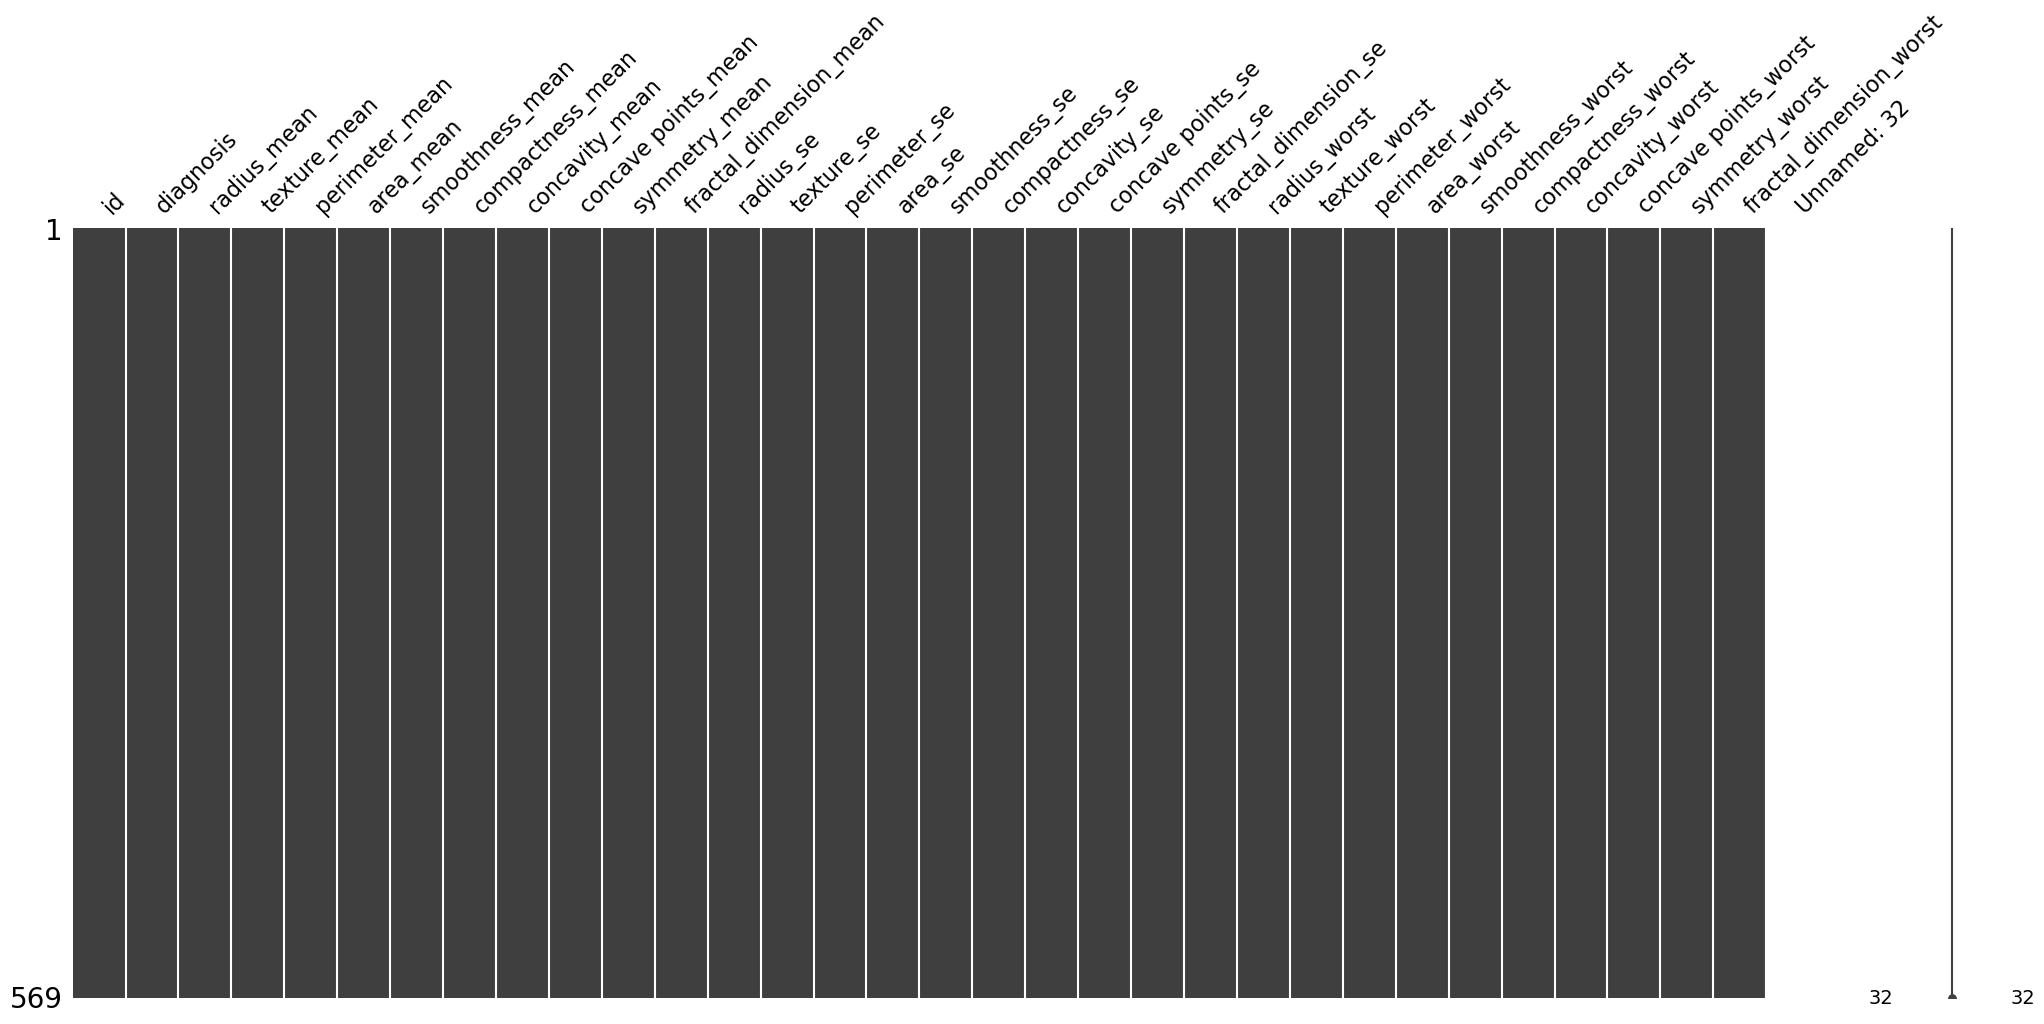

In [8]:
# Plot missing values 

msno.matrix(df)

In [9]:
# statistics 

df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


- Handle unnecessary columns.

In [10]:
#Remove the columns "Unnamed 32" and id. 

df.drop('Unnamed: 32', axis=1 , inplace=True)
df.drop('id', axis=1 , inplace=True)

- Encode **diagnosis** columns 

In [11]:
#Encode:  M --> 1 and B --> 0

df['diagnosis'] = [1 if col=='M' else 0 if col=="B" else None for col in df['diagnosis']]

- Explore the distribution of classes in the target variable ('diagnosis').


Diagnosis Class distribution:
 diagnosis
0    357
1    212
Name: count, dtype: int64


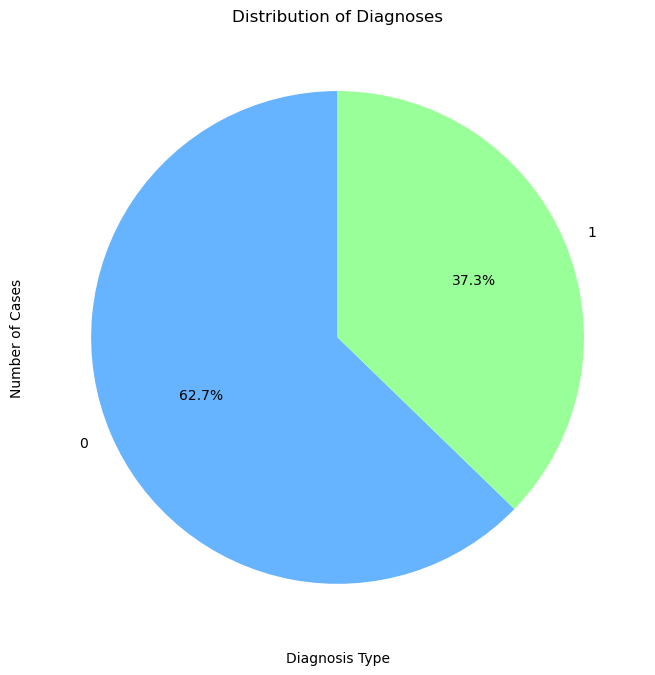

In [12]:
import matplotlib.pyplot as plt

diagnosis_counts = df['diagnosis'].value_counts()
print("\nDiagnosis Class distribution:\n", diagnosis_counts)

# Plotting the class distribution 
plt.figure(figsize=(8, 8))
diagnosis_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])

# Title and labels
plt.title('Distribution of Diagnoses')
plt.xlabel('Diagnosis Type')
plt.ylabel('Number of Cases')

plt.show()


### 2. Data Visualization
- Create visualizations to understand feature distributions.
- Use violin plots, pair plots, and correlation matrices.
- Plot a bar chart to display the distribution of classes in the target variable ('diagnosis').
____

- Create visualizations to understand feature distributions.

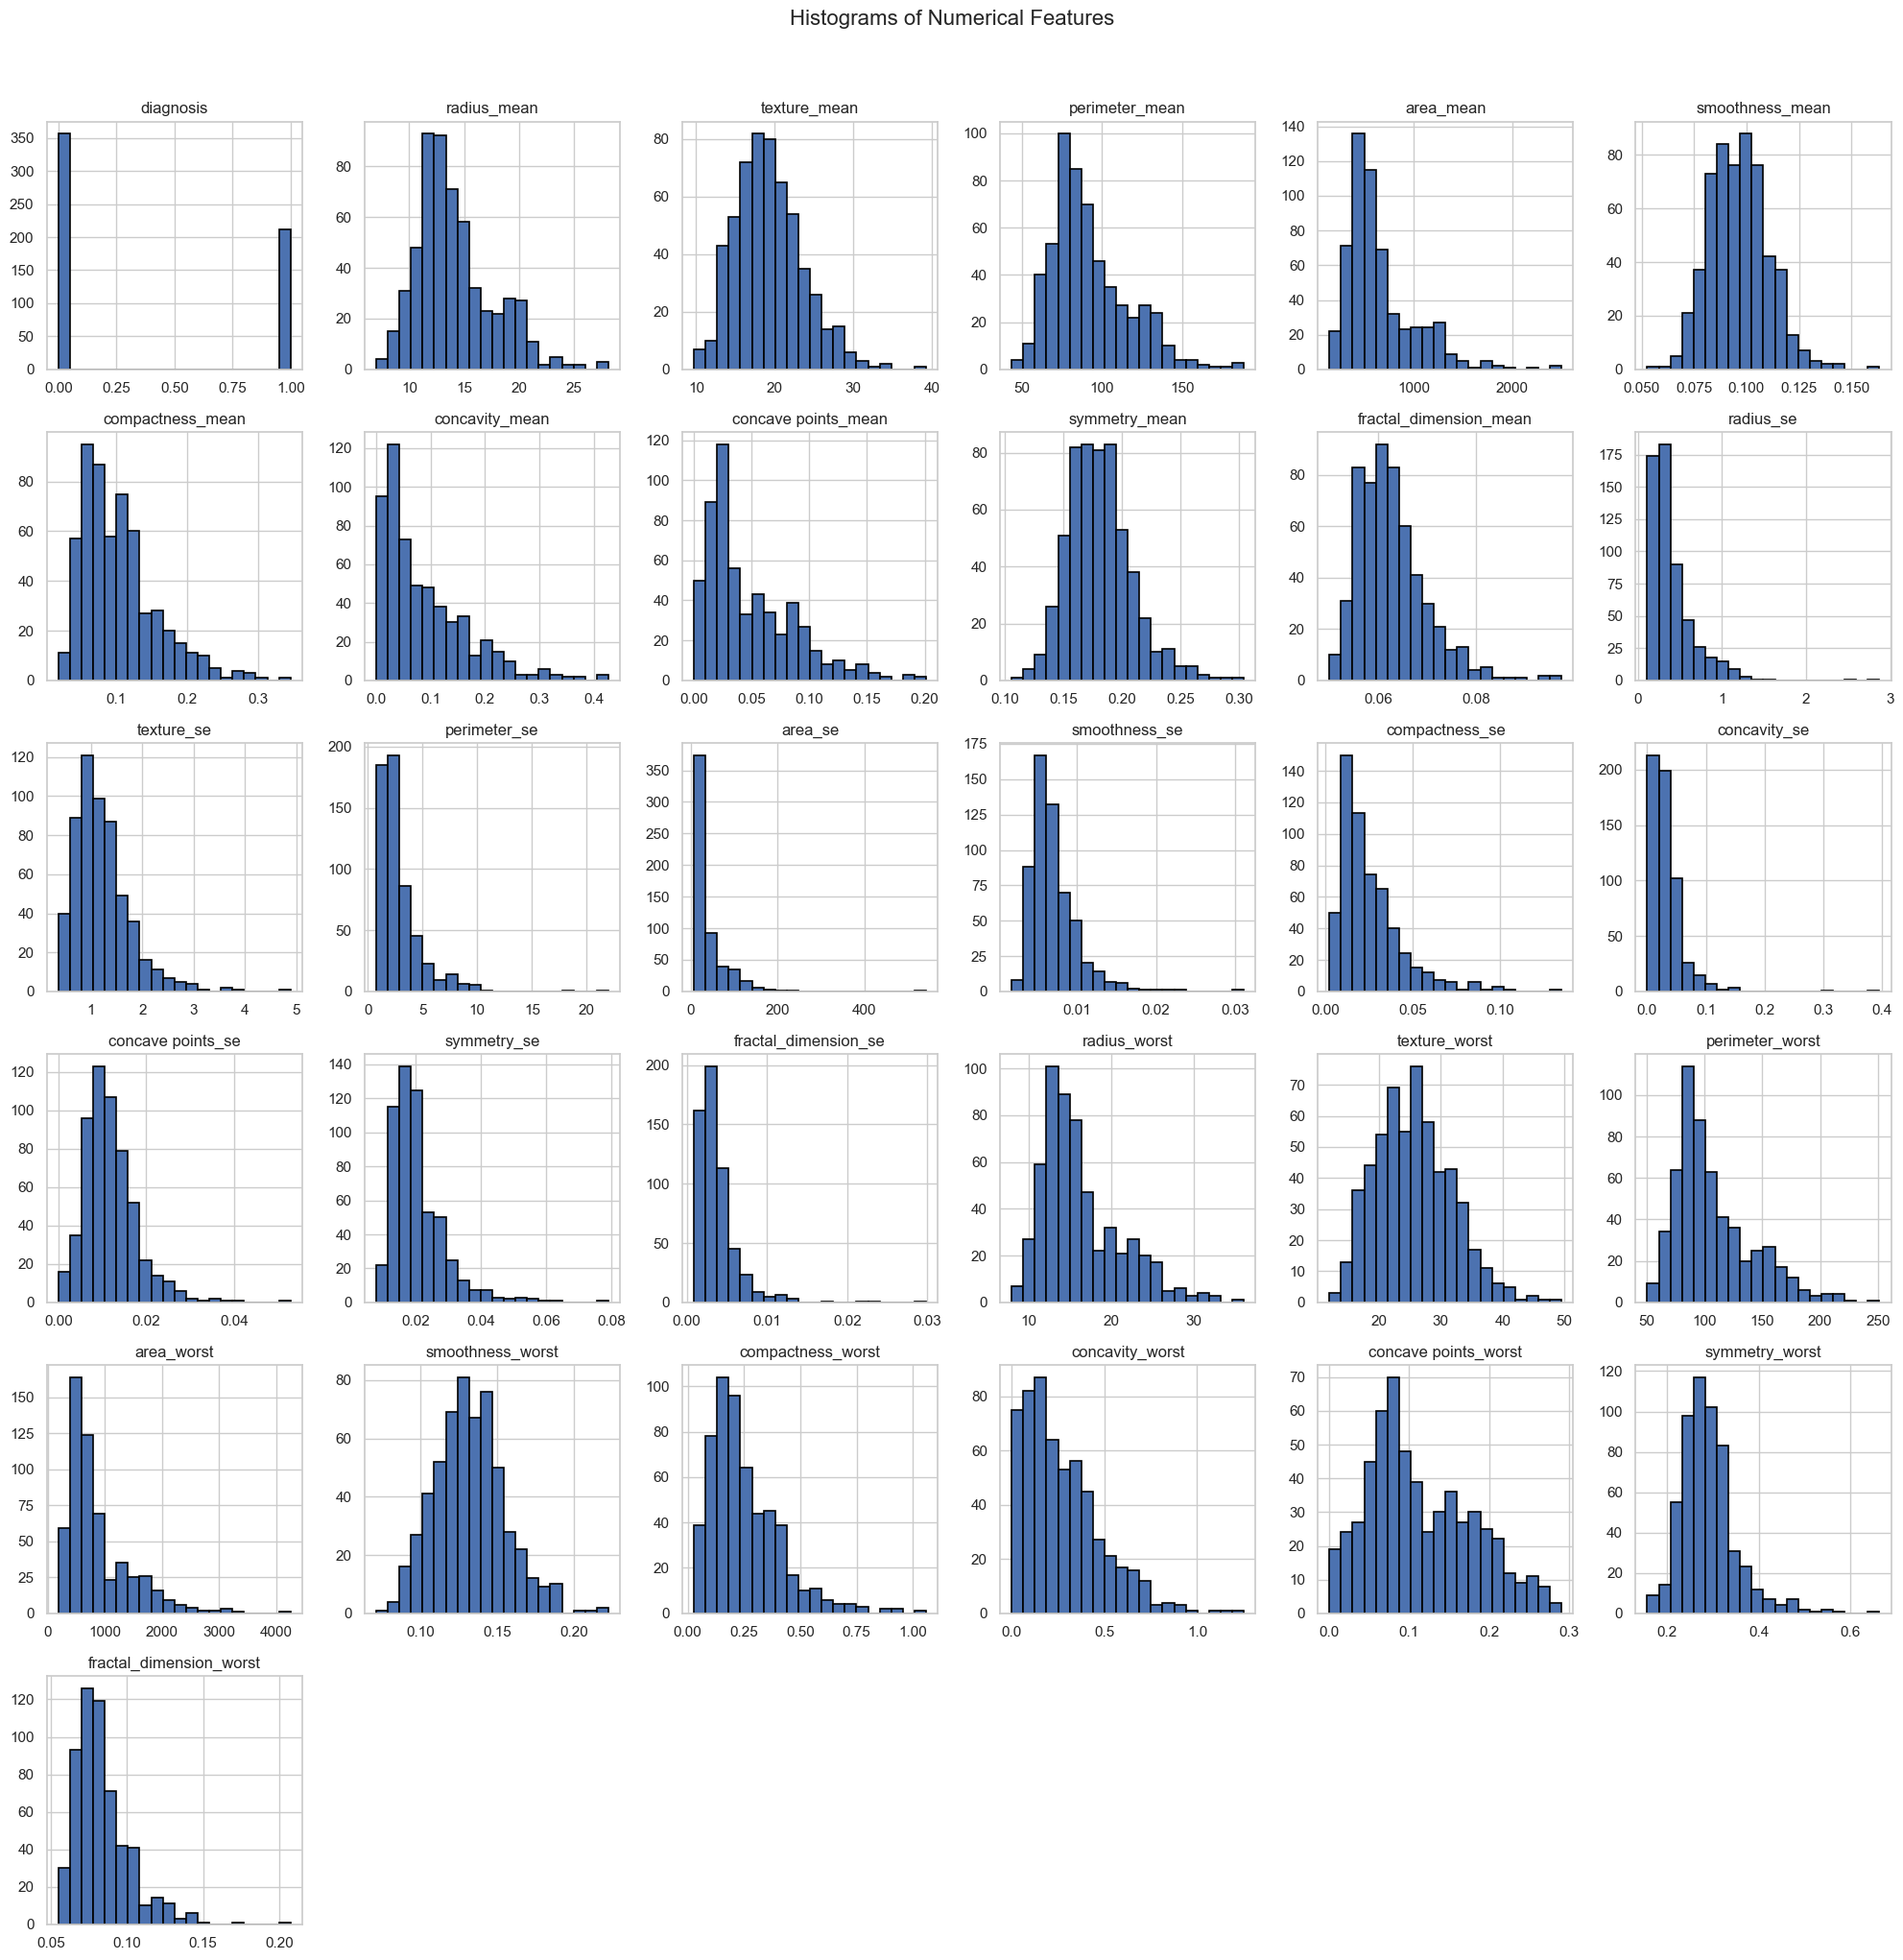

In [13]:
# Setpecific graph style
sns.set(style="whitegrid")

# Define params
hist_params = dict(bins=20, edgecolor='black', linewidth=1.2, figsize=(20, 20))

# Histogram chart for all numerical features
df.hist(**hist_params)

# Title
plt.suptitle('Histograms of Numerical Features', fontsize=16, y=1.02)

# Adjust layout 
plt.tight_layout()

#Show
plt.show()


- correlation matrix 

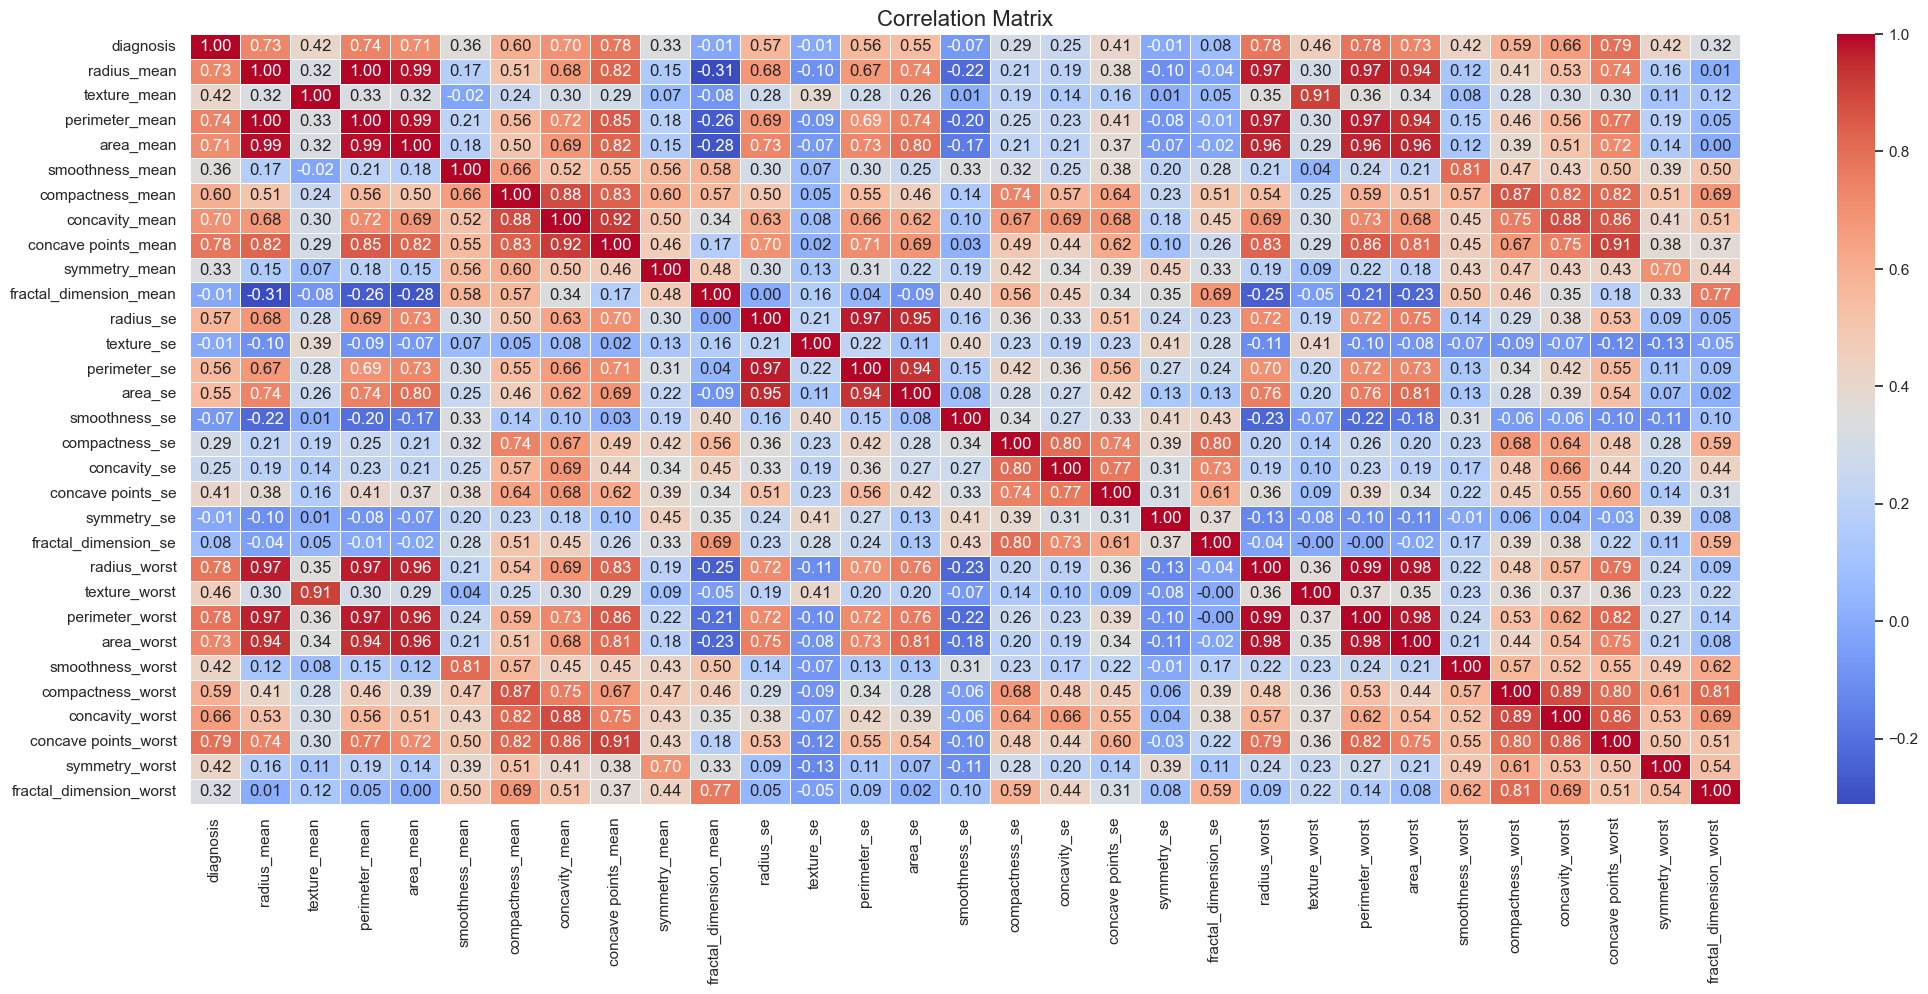

In [14]:
correlation_matrix = df.corr()

# Create a figure to control the size
plt.figure(figsize=(25, 10))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Set title
plt.title('Correlation Matrix', fontsize=16)

# Show the plot
plt.show()

### 3. Data Preprocessing
- Split the dataset into features (X) and the target variable (y).
- Standardize the features if necessary.
- Split the data into training and testing sets.

______

- Split the dataset into features (X) and the target variable (y).

In [15]:
#Separe features and target 

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

- Standardize the features if necessary.

**StandardScaler** is Less sensitive to outliers compared to **MinMaxScaler**.

In [16]:
#Use standarScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [17]:
# Convert to a DataFrame with column names
scaled_df = pd.DataFrame(scaled_X, columns=X.columns)

# Display or use the scaled DataFrame
scaled_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


- Split the data into training and testing sets.

In [18]:
# Split into training and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Save training data
with open('Splits/X_train.pkl', 'wb') as f:
    pickle.dump(X_train, f)

# Save training labels
with open('Splits/y_train.pkl', 'wb') as f:
    pickle.dump(y_train, f)

# Save test data
with open('Splits/X_test.pkl', 'wb') as f:
    pickle.dump(X_test, f)

# Save test labels
with open('Splits/y_test.pkl', 'wb') as f:
    pickle.dump(y_test, f)

### 4. K-Nearest Neighbors Model
- Implement the KNN algorithm using scikit-learn.
- Experiment with different values of k.
- Optimize the model using techniques like hyperparameter tuning (GridSearchCV or RandomizedSearchCV).
- Evaluate the model's performance using accuracy, precision, recall, and F1 score.


- Implement the KNN algorithm using scikit-learn.

In [20]:
# Create a KNN classifier
knn_classifier = KNeighborsClassifier()  

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.956140350877193


In [21]:
k_list = [1,2,3,4,5,6]

for k in k_list : 
    model = KNeighborsClassifier(k)
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    print(f"Accuracy for k={k}: {accuracy}")

Accuracy for k=1: 0.9298245614035088
Accuracy for k=2: 0.9385964912280702
Accuracy for k=3: 0.9298245614035088
Accuracy for k=4: 0.9473684210526315
Accuracy for k=5: 0.956140350877193
Accuracy for k=6: 0.9385964912280702


**NB:** We can notice that we have the best accuracy with k = 5.

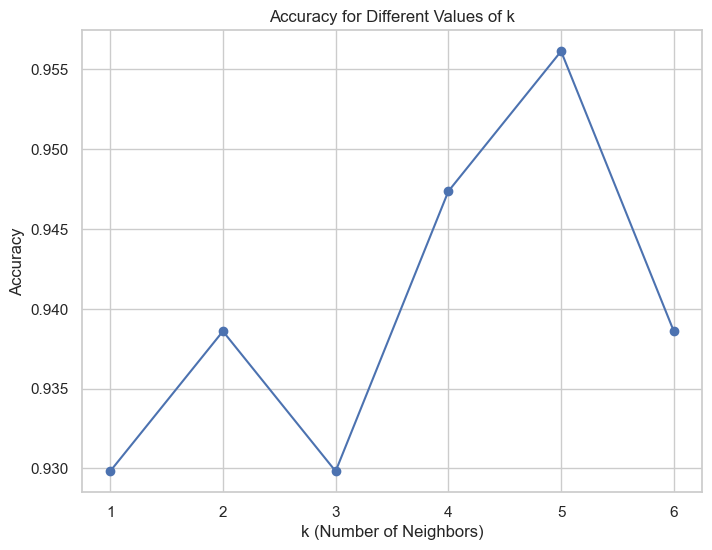

In [22]:
#Plot to confirm 

accuracy_scores = []

for k in k_list:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(k_list, accuracy_scores, marker='o')
plt.title('Accuracy for Different Values of k')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

- Optimize the model using techniques like hyperparameter tuning (GridSearchCV or RandomizedSearchCV).

In [23]:
# Define the parameters
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6]}

# Create GridSearchCV
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')

# Fit 
grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: {:.2f}".format(grid_search.best_score_))

Best Parameters:  {'n_neighbors': 5}
Best Accuracy: 0.92


- Define the tuned model 

In [24]:
model_tuned = KNeighborsClassifier(n_neighbors=5)
model_tuned.fit(X_train, y_train)
y_pred_tuned = model_tuned.predict(X_test)

# Evaluate the accuracy
accuracy_tuned = model_tuned.score(X_test, y_test)
print(f'Accuracy Tuned on Test: {accuracy_tuned}')


Accuracy Tuned on Test: 0.956140350877193


- Prediction on a sample

In [25]:
# predict example 

sample_to_predict = X_train.head(2) # the first 2 row
sample_to_predict

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,9.029,17.33,58.79,250.5,0.1066,0.1413,0.3130,0.04375,0.2111,0.08046,...,10.31,22.65,65.5,324.7,0.1482,0.4365,1.252,0.1750,0.4228,0.1175
181,21.090,26.57,142.70,1311.0,0.1141,0.2832,0.2487,0.14960,0.2395,0.07398,...,26.68,33.48,176.5,2089.0,0.1491,0.7584,0.678,0.2903,0.4098,0.1284


In [26]:
#Predict the sample 

y_pred_sample = model_tuned.predict(sample_to_predict)

In [27]:
#Decoder : M <-- 1 and B <-- 0

y_pred_sample = ["M" if col == 1 else "B" if col == 0 else col for col in y_pred_sample]
y_pred_sample

['B', 'M']

- Evaluate the model's performance using accuracy, precision, recall, and F1 score.

In [28]:
# Classification report
classification_rep = classification_report(y_test, y_pred_tuned)

# Print the classification report
print("Classification Report:\n", classification_rep)


Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        71
           1       1.00      0.88      0.94        43

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



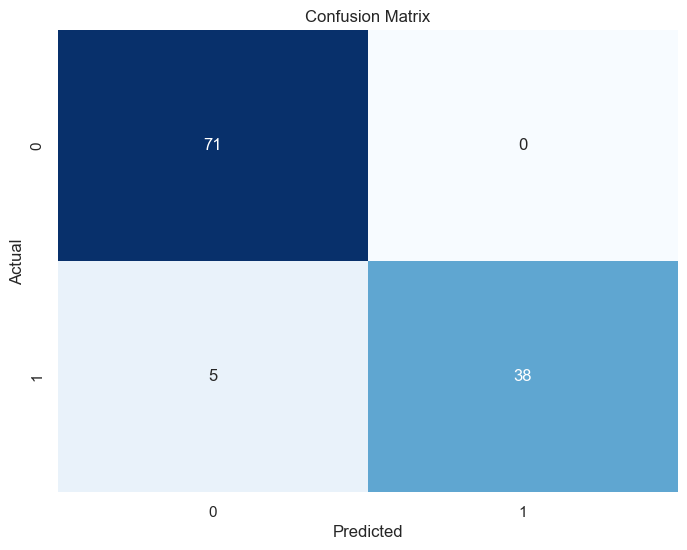

In [29]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_tuned)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=model_tuned.classes_, yticklabels=model_tuned.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

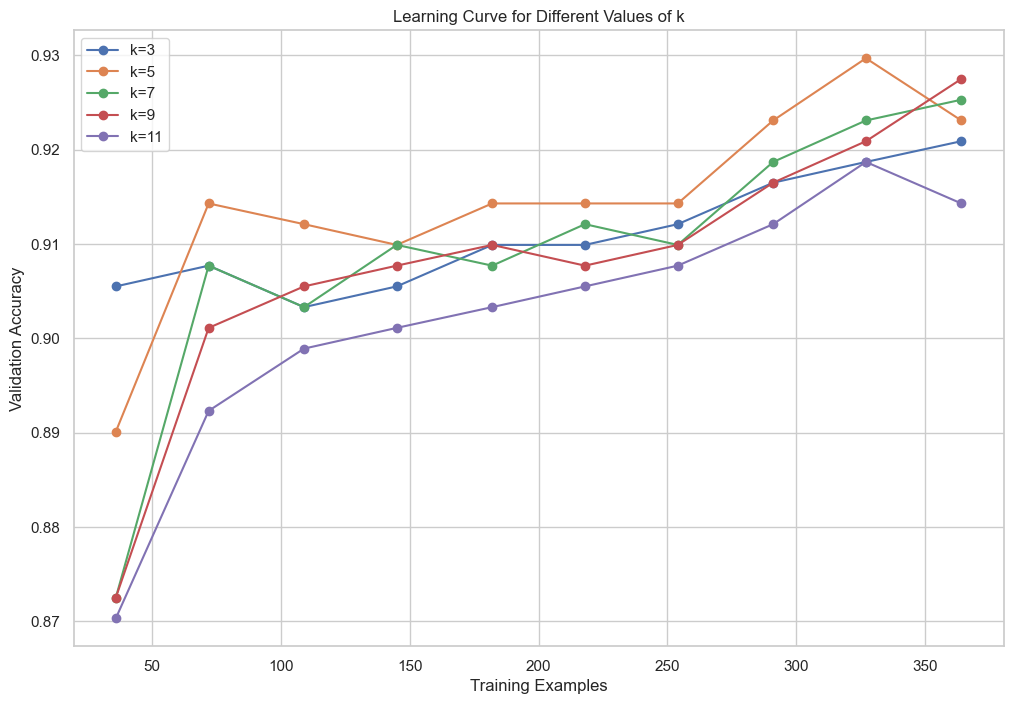

In [30]:
# Create a list of k values to experiment with
k_values = [3, 5, 7, 9, 11]

plt.figure(figsize=(12, 8))

for k in k_values:
    model_tuned = KNeighborsClassifier(n_neighbors=k)
    
    train_sizes, train_scores, test_scores = learning_curve(
        model_tuned, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

    # Calculate mean and standard deviation of training and test scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the learning curve for each k
    plt.plot(train_sizes, test_mean, label=f'k={k}', marker='o')

# Customize the plot
plt.title('Learning Curve for Different Values of k')
plt.xlabel('Training Examples')
plt.ylabel('Validation Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()


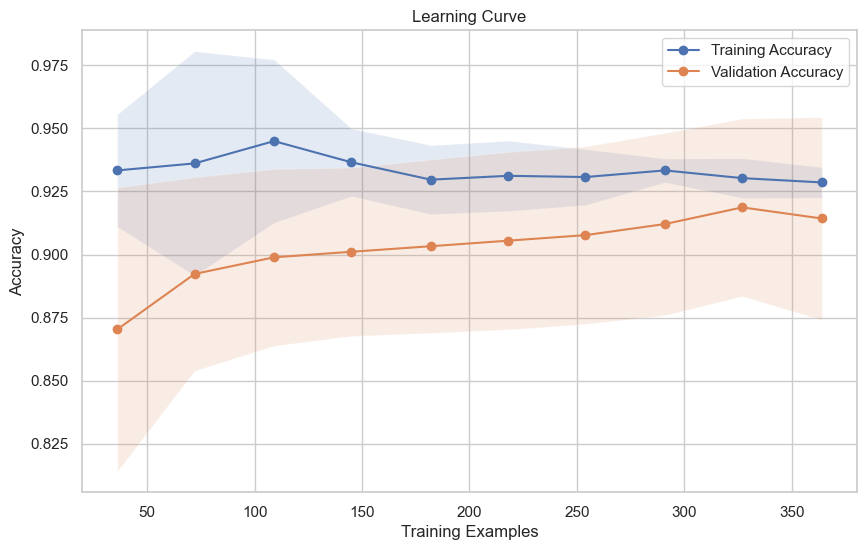

In [31]:
train_sizes, train_scores, test_scores = learning_curve(
    model_tuned, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, label='Validation Accuracy', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)

# Customize the plot
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()
